Dowloading Kaggle data

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manjunathainti","key":"bf164ab64c4d004775a8ab8dcda6640a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 134MB/s]


In [ ]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


Step 1: Install Necessary Libraries

In [ ]:
# Install essential libraries for analysis, visualization, and ML modeling
!pip install sweetviz
!pip install autoviml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0

Step 2: Import Libraries

In [ ]:
# Importing essential libraries for data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

Step 3: Load the Dataset


In [ ]:
# Load dataset
data = pd.read_csv('AB_NYC_2019.csv')  # Replace with the actual path if different

# Display basic info and first few rows
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Step 4: Generate EDA Report with Sweetviz


In [ ]:
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [ ]:
# Creating an EDA report with Sweetviz to analyze data insights automatically
eda_report = sv.analyze(data)
eda_report.show_html("NYC_Taxi_EDA_Report.html")  # Saves as an HTML file for download and offline viewing

                                             |          | [  0%]   00:00 -> (? left)

Report NYC_Taxi_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Step 5: Handle Missing Data and Outliers


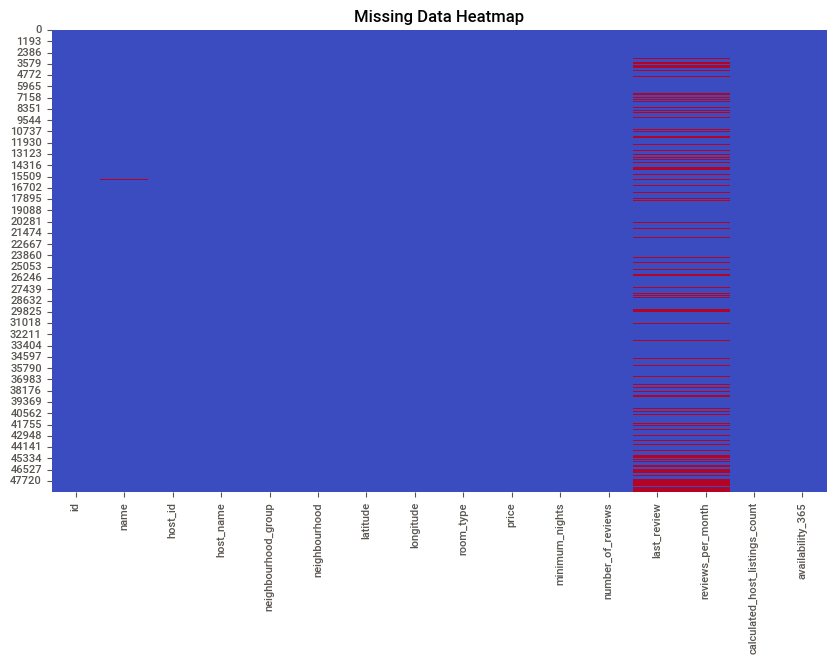

In [ ]:
# Visualizing missing data to identify gaps
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Data Heatmap')
plt.show()

# Impute missing values for the 'price' column with median values
imputer = SimpleImputer(strategy="median")
data[['price']] = imputer.fit_transform(data[['price']])

# Dropping rows with missing values in essential columns
data.dropna(subset=['name', 'host_name'], inplace=True)

##Step 6: Data Visualization
Visualization 1: Distribution of Prices

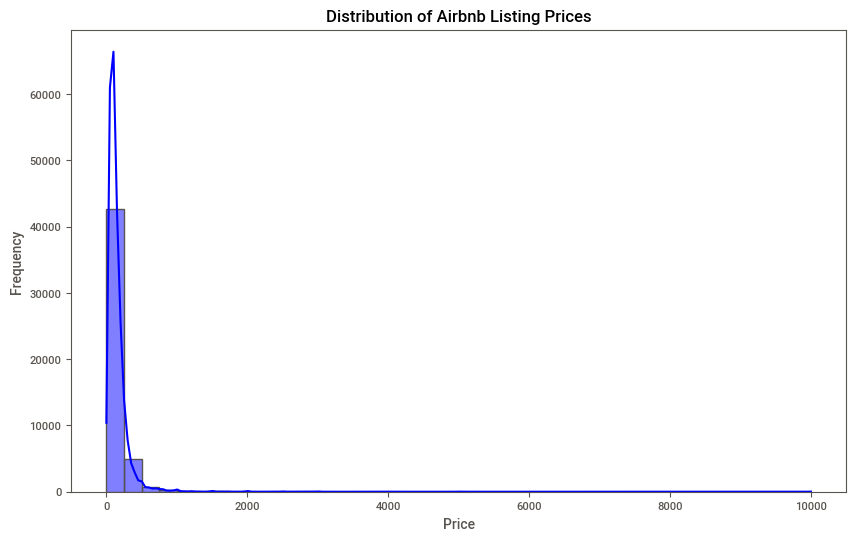

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=40, kde=True, color='blue')
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Visualization 2: Average Price by Neighborhood Group


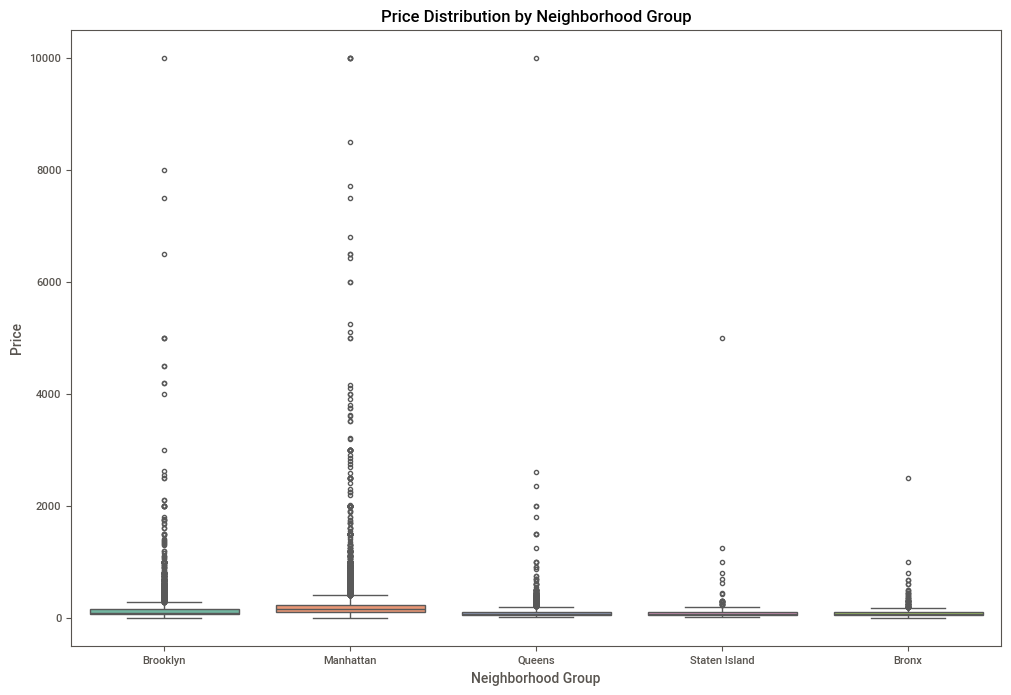

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set2')
plt.title("Price Distribution by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.show()

Visualization 3: Number of Reviews vs Price

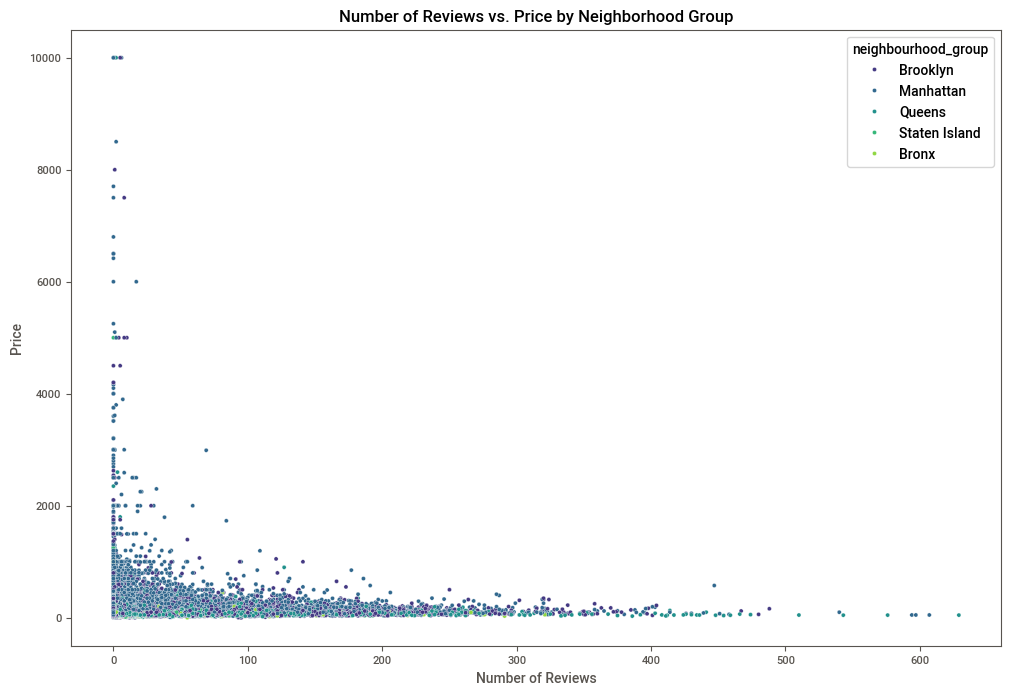

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='number_of_reviews', y='price', data=data, hue='neighbourhood_group', palette='viridis')
plt.title("Number of Reviews vs. Price by Neighborhood Group")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

#Step 7: Encoding and Feature Scaling
Step 7.1: Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'neighbourhood_group' and 'room_type' using Label Encoding
label_encoder = LabelEncoder()
data['neighbourhood_group'] = label_encoder.fit_transform(data['neighbourhood_group'])
data['room_type'] = label_encoder.fit_transform(data['room_type'])

Step 7.2: Standardizing Numeric Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
data[['price', 'minimum_nights', 'number_of_reviews']] = scaler.fit_transform(data[['price', 'minimum_nights', 'number_of_reviews']])

Step 7.3: Insert Feature Selection

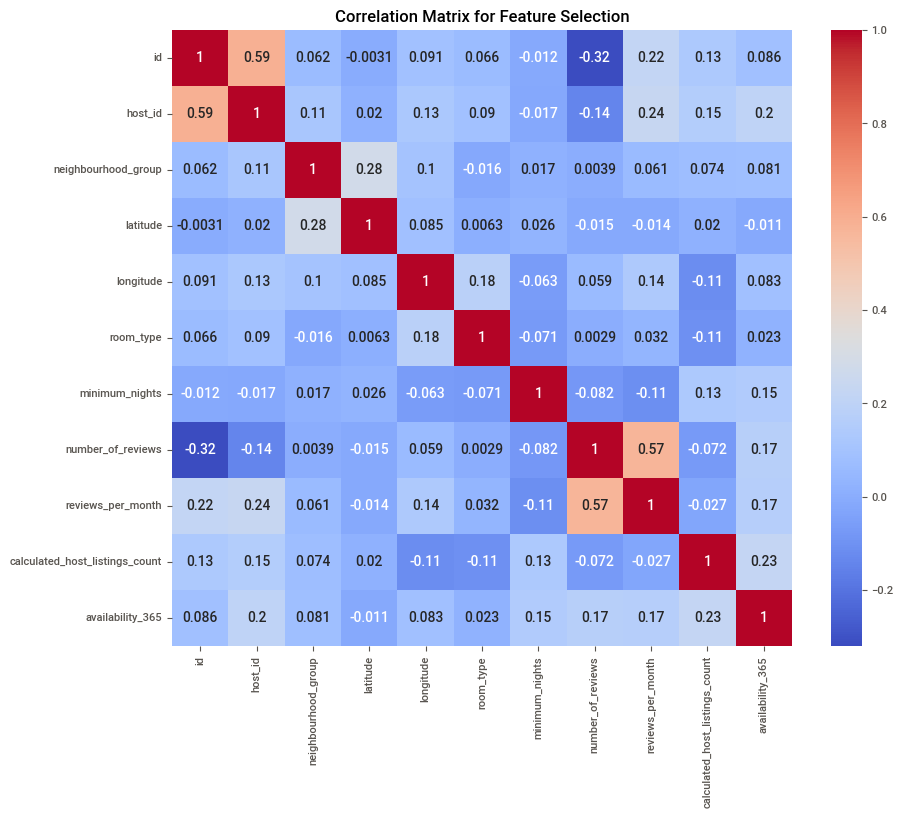

Selected Features: Index(['id', 'host_id', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# Define the target variable
target_variable = 'price'  # Make sure this matches your actual target variable name

# Select only numeric columns for feature selection, excluding the target
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=[target_variable])

# Impute missing values in numeric_data
imputer = SimpleImputer(strategy="median")
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Display correlation matrix to find relationships between features
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Feature Selection")
plt.show()

# Remove low-variance features
selector = VarianceThreshold(threshold=0.1)
data_high_variance = selector.fit_transform(numeric_data_imputed)

# Recursive Feature Elimination (RFE) for feature importance
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(numeric_data_imputed, data[target_variable])
selected_features = numeric_data_imputed.columns[rfe.support_]
print("Selected Features:", selected_features)


Step 8: Clustering and Anomaly Detection

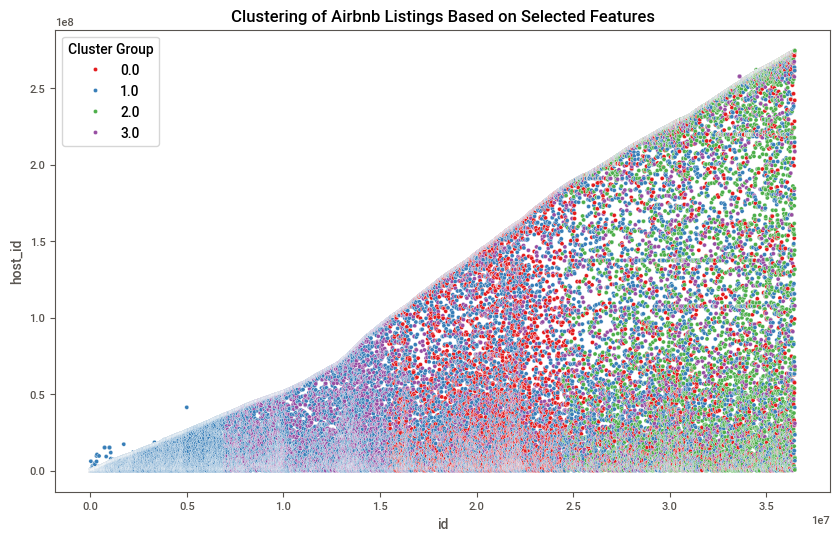

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Impute missing values in selected features
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data[selected_features]), columns=selected_features)

# Perform KMeans clustering with 4 clusters (adjust as needed)
kmeans_model = KMeans(n_clusters=4, random_state=42)
data['cluster_group'] = kmeans_model.fit_predict(data_imputed)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_imputed[selected_features[0]], y=data_imputed[selected_features[1]], hue='cluster_group', data=data, palette='Set1')
plt.title("Clustering of Airbnb Listings Based on Selected Features")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Cluster Group')
plt.show()


Step 8.2: Anomaly Detection with Isolation Forest

Detected Anomalies in the Dataset:
       id                                 name  host_id        host_name  \
3    3831      Cozy Entire Floor of Brownstone     4869      LisaRoxanne   
7    5178     Large Furnished Room Near B'way      8967         Shunichi   
30   9668                front room/double bed    32294  Ssameer Or Trip   
33   9783                  back room/bunk beds    32294  Ssameer Or Trip   
39  12048  LowerEastSide apt share shortterm 1     7549              Ben   

    neighbourhood_group    neighbourhood  latitude  longitude  room_type  \
3                     1     Clinton Hill  40.68514  -73.95976          0   
7                     2   Hell's Kitchen  40.76489  -73.98493          1   
30                    2           Harlem  40.82245  -73.95104          1   
33                    2           Harlem  40.82130  -73.95318          1   
39                    2  Lower East Side  40.71401  -73.98917          2   

       price  minimum_nights  number_of_reviews las

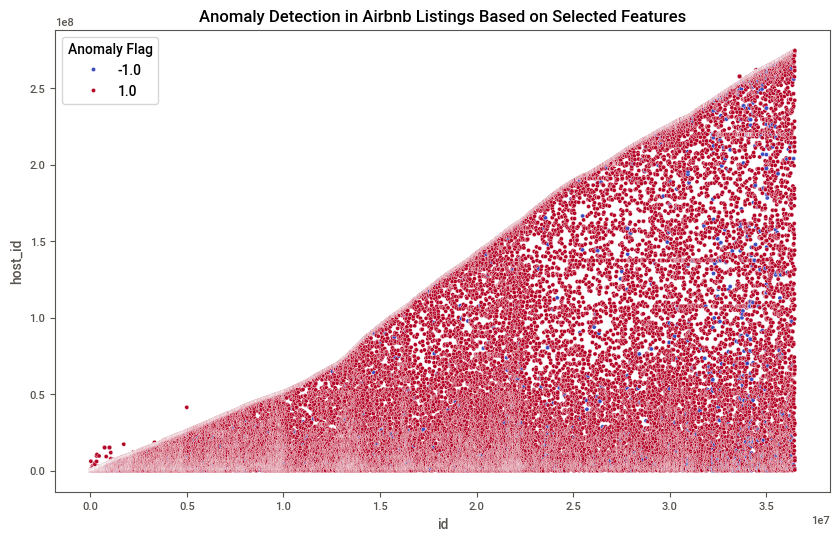

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Impute missing values in selected features for Isolation Forest
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data[selected_features]), columns=selected_features)

# Fit Isolation Forest to detect anomalies
iso_forest_model = IsolationForest(contamination=0.03, random_state=42)
data['anomaly_flag'] = iso_forest_model.fit_predict(data_imputed)

# Display a few anomalies for inspection
print("Detected Anomalies in the Dataset:")
print(data[data['anomaly_flag'] == -1].head())

# Visualize anomalies in the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_imputed[selected_features[0]], y=data_imputed[selected_features[1]], hue='anomaly_flag', data=data, palette='coolwarm')
plt.title("Anomaly Detection in Airbnb Listings Based on Selected Features")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Anomaly Flag')
plt.show()


#Step 9: Model Building and Evaluation

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in training and testing sets
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Initialize and train models as before
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and display performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R^2: {r2:.4f}")


Linear Regression - MSE: 0.7945, R^2: 0.0915
Random Forest - MSE: 0.7800, R^2: 0.1080
Gradient Boosting - MSE: 0.7336, R^2: 0.1611


Step 9.2: Feature Importance Visualization

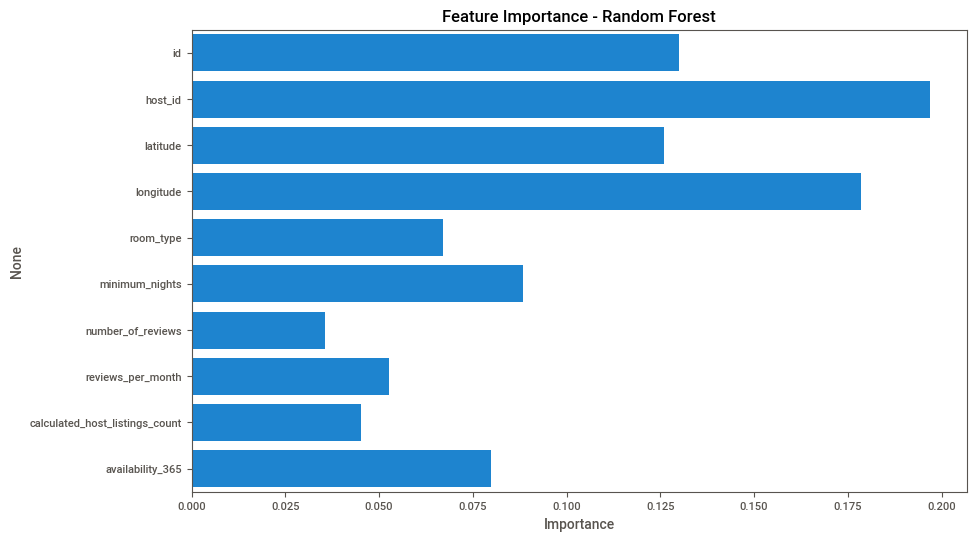

In [ ]:
# Feature Importance for Random Forest
importances = models['Random Forest'].feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=selected_features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()

Step 9.3: Save the Best Model and Make Predictions


In [ ]:
import joblib

# Save the Random Forest model as it performs well (you can select another based on results)
best_model = models['Random Forest']
joblib.dump(best_model, 'best_airbnb_model.pkl')

# Load the model to confirm it saved correctly
loaded_model = joblib.load('best_airbnb_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)
print("Sample Predictions with Loaded Model:", y_pred_loaded[:10])


Sample Predictions with Loaded Model: [ 0.15210299  0.90854497  0.00524369 -0.49198828  0.36677234  1.98905148
  0.27590106  0.04370684 -0.39424858 -0.14756824]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared for the best model (e.g., Random Forest)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.7800
R-squared: 0.1080


Experiment with Different Models

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb:.4f}, R^2: {r2_gb:.4f}")


Gradient Boosting - MSE: 0.7262, R^2: 0.1696


In [ ]:
from catboost import CatBoostRegressor

# Initialize and train a CatBoost model
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_catboost = catboost_model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - MSE: {mse_catboost:.4f}, R^2: {r2_catboost:.4f}")


CatBoost - MSE: 0.6696, R^2: 0.2342


Step 9.4: Plot Predictions vs. Actual Values

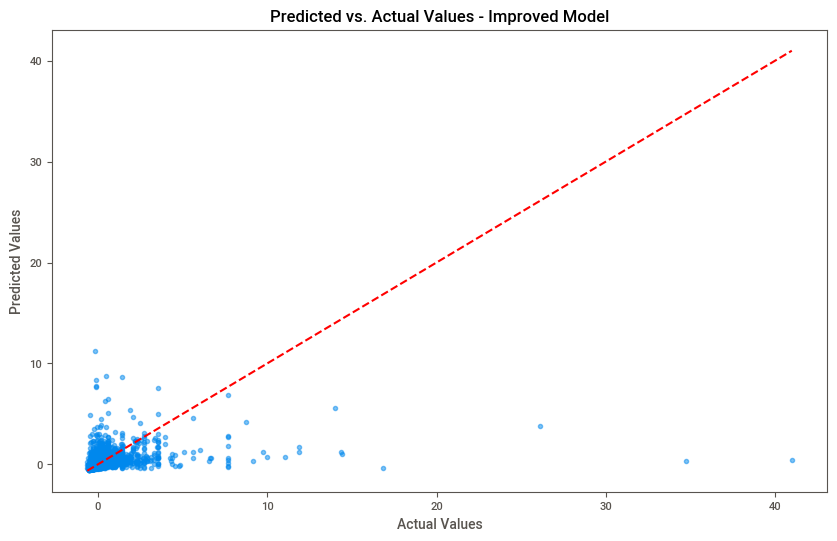

In [ ]:
# Assuming best_model is the improved model (replace as necessary)
y_pred_best = best_model.predict(X_test)

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values - Improved Model")
plt.show()


#Step 10: Auto EDA Code
